In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

#### LOAD THE DATA FRAME IN THE NOTEBOOK 

1. **video_id** youtbe video unique ID
2. **ternding_date** the date that the video became a trend
3. **title** the title of the video
4. **channel_title** the name of the publisher's channel
5. **category_id** the id of the category that the video belong to
6. **publish_time** the date the video got published
7. **tags** the tags asscoiated with the video
8. **views** count of views
9. **likes** count of likes
10. **dislikes** count of dislikes
11. **comment_count** count of comments
12. **thumbnail_link** link for the video thumbnail
13. **comments_disabled**, **ratings_disabled**, and **video_error_or_removed** are booleans
14. **description** description of the video

In [2]:
df = pd.read_csv('CAvideos.csv')
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [3]:
df.shape

(40881, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

#### DATA CLEANING

1. Change dates from object to datetime 
2. Remove null values
3. Check for duplicates

In [5]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].astype

<bound method NDFrame.astype of 0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40876   2018-06-14
40877   2018-06-14
40878   2018-06-14
40879   2018-06-14
40880   2018-06-14
Name: trending_date, Length: 40881, dtype: datetime64[ns]>

In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].astype

<bound method NDFrame.astype of 0       2017-11-10 17:00:03+00:00
1       2017-11-13 17:00:00+00:00
2       2017-11-12 19:05:24+00:00
3       2017-11-12 18:01:41+00:00
4       2017-11-09 11:04:14+00:00
                   ...           
40876   2018-06-13 18:00:07+00:00
40877   2018-06-13 19:01:18+00:00
40878   2018-06-11 17:30:53+00:00
40879   2018-06-13 04:00:05+00:00
40880   2018-06-13 16:00:03+00:00
Name: publish_time, Length: 40881, dtype: datetime64[ns, UTC]>

In [7]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [8]:
df['description']=df['description'].fillna('')
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Reading the json file 
# We made a new column with the category name corresponding to the category ID
df['category_name'] = np.nan
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43),"category_name"] = 'Shows'
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Entertainment
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,Entertainment
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,News and Politics


### DATA ANALYSIS
Questions
1. The most viewed video
2. The first published video in the provided timeline and the time it got in trend
3. The channel with the most views
4. The video with the most likes and the most dislikes
6. The category that the people liked the most and disliked the most
7. The most famous tags that affected the video (increase the views)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

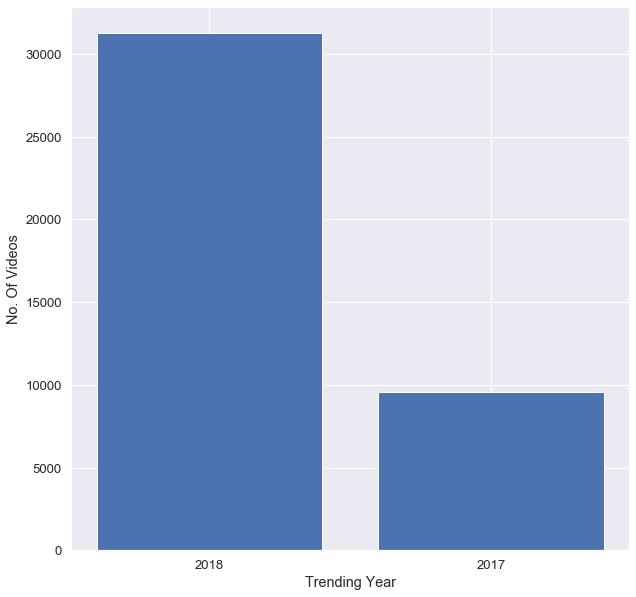

In [11]:
# lets see in which year the data was collected
day=df['trending_date'].dt.strftime ('%Y')
my_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Trending year','No. Of Videos']) 
plt.bar(count['Trending year'],count['No. Of Videos'])
plt.xlabel("Trending Year")
plt.ylabel("No. Of Videos")
plt

In [12]:
#1. The most viewed video
print ('Video:{0} with {1} views'.format(
    df[df['views']==df['views'].max()].title.to_string(index=False),
    df['views'].max()))

Video: YouTube Rewind: The Shape of 2017 | #YouTubeRe... with 137843120 views


In [13]:
#2. The first published video in the provided timeline and the time it got in trend
df[df['publish_time'] == min(df['publish_time'])]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
12443,hTSAyR3nOR0,2018-01-17,Dolores O'riordan - her house in Canada,nenuostabu,10,2008-01-13 01:32:16+00:00,"dolores|""o'riordan""|""house""|""canada""|""artist""|...",469232,1315,48,233,https://i.ytimg.com/vi/hTSAyR3nOR0/default.jpg,False,False,False,Dolores O'riordan - her house in Canada,Music
12685,hTSAyR3nOR0,2018-01-18,Dolores O'riordan - her house in Canada,nenuostabu,10,2008-01-13 01:32:16+00:00,"dolores|""o'riordan""|""house""|""canada""|""artist""|...",520808,1519,51,302,https://i.ytimg.com/vi/hTSAyR3nOR0/default.jpg,False,False,False,Dolores O'riordan - her house in Canada,Music


In [14]:
#3. The channel with the most views
print('The channel: {0} with total views of {1}'.format(
    df.groupby('channel_title').sum()['views'].idxmax(),
    df.groupby('channel_title').sum()['views'].max()))

The channel: Marvel Entertainment with total views of 1011420205


In [15]:
#4. The video with the most likes and the most dislikes
print ('Video:{0} with {1} likes\n'.format(
    df[df['likes']==df['likes'].max()].title.to_string(index=False),
    df['likes'].max()))
print ('Video:{0} with {1} dislikes\n'.format(
    df[df['dislikes']==df['dislikes'].max()].title.to_string(index=False),
    df['dislikes'].max()))

Video: BTS (방탄소년단) 'FAKE LOVE' Official MV with 5053338 likes

Video: YouTube Rewind: The Shape of 2017 | #YouTubeRe... with 1602383 dislikes



In [16]:
#5. The category that the people liked the most and disliked the most
print('The category id: {0} with total likes of {1}'.format(
    df.groupby('category_id').sum()['likes'].idxmax(),
    df.groupby('category_id').sum()['likes'].max()))

The category id: 10 with total likes of 564447530


In [17]:
#6. The most famous tags that affected the video (increase the views)
tags = dict()
for tag, view in zip(df['tags'], df['views']):
    for i in tag.split('|'):
        i = i.replace('"', '')
        try:
            tags[i] += view
        except:
            tags[i] = view
tags

{'Eminem': 357238770,
 'Walk': 138898624,
 'On': 125607897,
 'Water': 126521889,
 'Aftermath/Shady/Interscope': 251121887,
 'Rap': 1452688908,
 'plush': 16832923,
 'bad unboxing': 26505023,
 'unboxing': 294863578,
 'fan mail': 25401367,
 'idubbbztv': 39867311,
 'idubbbztv2': 36174053,
 'things': 66351498,
 'best': 352325340,
 'packages': 12970595,
 'plushies': 12697273,
 'chontent chop': 12697273,
 'racist superman': 37676463,
 'rudy': 85847480,
 'mancuso': 76826120,
 'king': 45746310,
 'bach': 59157733,
 'racist': 66658287,
 'superman': 62072396,
 'love': 347551800,
 'rudy mancuso poo bear black white official music video': 21451581,
 'iphone x by pineapple': 16831388,
 'lelepons': 295946086,
 'hannahstocking': 295982799,
 'rudymancuso': 295946086,
 'inanna': 287738209,
 'anwar': 287738209,
 'sarkis': 286772742,
 'shots': 304153760,
 'shotsstudios': 286809455,
 'alesso': 295946086,
 'anitta': 316248350,
 'brazil': 308803518,
 "Getting My Driver's License ": 16831388,
 ' Lele Pons': 10

### Data visualization

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40881 non-null  object             
 1   trending_date           40881 non-null  datetime64[ns]     
 2   title                   40881 non-null  object             
 3   channel_title           40881 non-null  object             
 4   category_id             40881 non-null  int64              
 5   publish_time            40881 non-null  datetime64[ns, UTC]
 6   tags                    40881 non-null  object             
 7   views                   40881 non-null  int64              
 8   likes                   40881 non-null  int64              
 9   dislikes                40881 non-null  int64              
 10  comment_count           40881 non-null  int64              
 11  thumbnail_link          40881 non-null  o

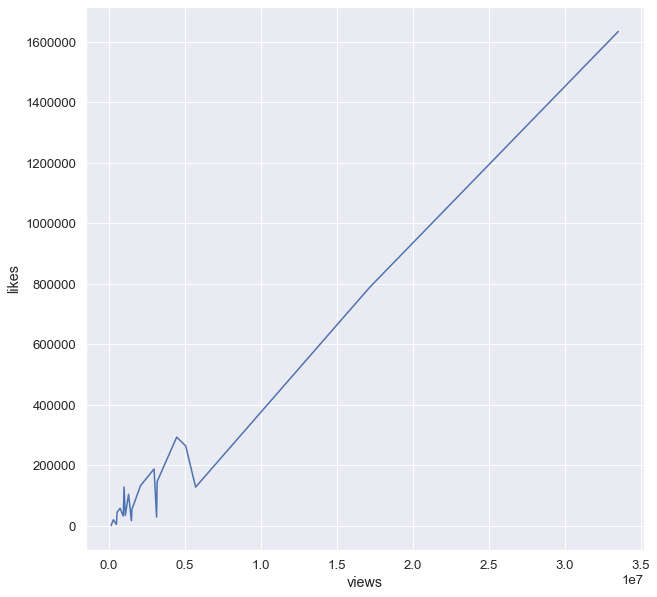

In [19]:
# Relation between views and likes
sns.lineplot(x=df['views'][:20], y=df['likes'][:20])

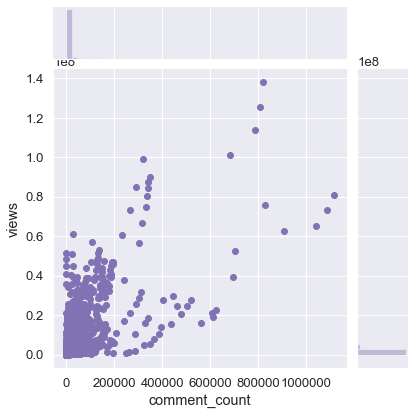

In [20]:
sns.jointplot(x='comment_count', y='views', data=df, color='m')

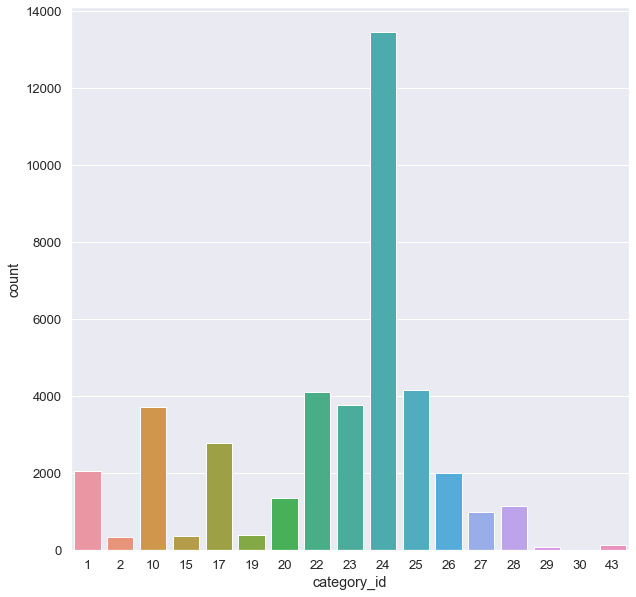

In [21]:
# Categories
sns.countplot(x='category_id', data=df)

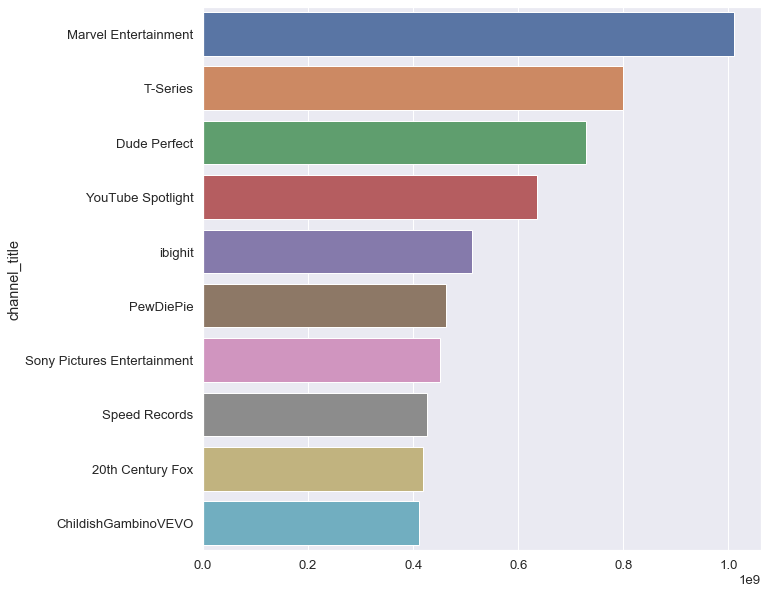

In [22]:
# top 10 channel with most views
series = df.groupby('channel_title').sum()['views'].sort_values(ascending=False).head(10)
sns.barplot(x=series.values, y=series.index)

## Data preprocessing
- Remove unnecassry columns
- Work with Categorical data
- Split data to Train and Test Sets
- Feature Scaling

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40881 non-null  object             
 1   trending_date           40881 non-null  datetime64[ns]     
 2   title                   40881 non-null  object             
 3   channel_title           40881 non-null  object             
 4   category_id             40881 non-null  int64              
 5   publish_time            40881 non-null  datetime64[ns, UTC]
 6   tags                    40881 non-null  object             
 7   views                   40881 non-null  int64              
 8   likes                   40881 non-null  int64              
 9   dislikes                40881 non-null  int64              
 10  comment_count           40881 non-null  int64              
 11  thumbnail_link          40881 non-null  o

In [24]:
c=df.channel_title.value_counts()
c

SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
                  ... 
MMA Videos           1
Elles                1
Michelle 1           1
Slicky59             1
NocutV               1
Name: channel_title, Length: 5076, dtype: int64

In [25]:
import re
def removeAsciiChar(s):
    return re.sub(r'[^A-Za-z]', '', s)

result = map(removeAsciiChar, c.index)
titles=list(result)
titles

['SETIndia',
 'MSNBC',
 'FBE',
 'TheYoungTurks',
 'REACT',
 'VikatanTV',
 'CNN',
 'TheLateShowwithStephenColbert',
 'ARYDigital',
 'RadaanMedia',
 'PhilipDeFranco',
 'MLGHighlights',
 'CommentAwards',
 'BuzzFeedVideo',
 'GoodMythicalMorning',
 'CollegeHumor',
 'TheEllenShow',
 'TheView',
 'BreakfastClubPowerFM',
 'LateNightwithSethMeyers',
 'NHL',
 'SABTV',
 'JimmyKimmelLive',
 'BuzzFeedBlue',
 'ESPN',
 'TeamEdge',
 'CinemaSins',
 'TheTonightShowStarringJimmyFallon',
 'TheRealDaytime',
 'Vox',
 'DailyDoseOfInternet',
 'LinusTechTips',
 'KitchenNightmares',
 'TroomTroom',
 'HUMTV',
 'StrictlyDumpling',
 'PowerfulJRE',
 'GoodMythicalMORE',
 'CowChop',
 'ComedyCentralUK',
 'EatBulaga',
 'FirstWeFeast',
 'secureteam',
 '',
 'SpeedRecords',
 'BingingwithBabish',
 'PewDiePie',
 'Tasty',
 'ElhiwarEttounsi',
 'CrazyRussianHacker',
 'WWE',
 'ABSCBNEntertainment',
 'SkipandShannonUNDISPUTED',
 'TVChinaHunanTVOfficialChannel',
 'LamaFach',
 'TheLateLateShowwithJamesCorden',
 'RapidHighlights',
 '

In [26]:
data=df[df['channel_title'].isin(titles)]
data=data.reset_index()
data.drop(['index','video_id','trending_date','title','category_id','tags','thumbnail_link','description','publish_time'],axis=1,inplace=True)
data

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,EminemVEVO,17158579,787425,43420,125882,False,False,False,Music
1,iDubbbzTV,1014651,127794,1688,13030,False,False,False,Comedy
2,nigahiga,2095828,132239,1989,17518,False,False,False,Entertainment
3,DramaAlert,1309699,103755,4613,12143,False,False,False,News and Politics
4,VanossGaming,2987945,187464,9850,26629,False,False,False,Comedy
...,...,...,...,...,...,...,...,...,...
12909,HALO,2557709,65412,2264,17165,False,False,False,Gaming
12910,destinygame,1392609,38471,2932,21316,False,False,False,Gaming
12911,Looper,362153,5568,173,680,False,False,False,Entertainment
12912,SMTOWN,261128,32078,91,2021,False,False,False,Music


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i in ['channel_title','category_name']:
        data[i] = le.fit_transform(data[i])
data

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,304,17158579,787425,43420,125882,False,False,False,7
1,1333,1014651,127794,1688,13030,False,False,False,1
2,1396,2095828,132239,1989,17518,False,False,False,3
3,289,1309699,103755,4613,12143,False,False,False,8
4,1167,2987945,187464,9850,26629,False,False,False,1
...,...,...,...,...,...,...,...,...,...
12909,422,2557709,65412,2264,17165,False,False,False,5
12910,1301,1392609,38471,2932,21316,False,False,False,5
12911,622,362153,5568,173,680,False,False,False,3
12912,933,261128,32078,91,2021,False,False,False,7


In [28]:
# Split data to Train and Test Sets
x=data.drop(['likes'], axis=1)
y=data['likes']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Machine Learning

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
}

In [35]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.873899926873573
Test Score: 0.8782385249368294
RMSE: 63129.354749664104
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.9444390532518153
Test Score: 0.9019848230816971
RMSE: 56639.97645383853
-----------------------------------------------------------
Using model: SVR
Training Score: -0.05579405713455899
Test Score: -0.05748169701209393
RMSE: 186042.78396190863
-----------------------------------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9365609259602806
RMSE: 45567.459656566825
-----------------------------------------------------------
Using model: RF
Training Score: 0.9925411108280531
Test Score: 0.951968578839745
RMSE: 39649.6281290462
-----------------------------------------------------------


In [54]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred = model.predict(x_test)
y_pred.astype(int)

array([10802,  1362, 23034, ..., 51227, 11784,  8818])

In [49]:
y_test

7510      14069
1261        420
8082      15116
10183     12918
6387     106915
          ...  
2116      72270
5458     119566
9802      45020
4185      11959
3101       6948
Name: likes, Length: 2583, dtype: int64

## Testing on real data and deployment

In [50]:
import joblib

In [58]:
joblib.dump(model, 'model.h5')

['model.h5']

In [59]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [60]:
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

In [61]:
x.columns

Index(['channel_title', 'views', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'category_name'],
      dtype='object')

In [62]:
test_data = [0,30000, 172, 200, 0, 0, 0, 'Music']
test_data[7] = le.transform([test_data[7]])[0]
test_data

[0, 30000, 172, 200, 0, 0, 0, 7]

In [63]:
test_data = scaler.transform([test_data])

In [46]:
int(model.predict(test_data))

1245